In [39]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_class_weight

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from xgboost import XGBClassifier, XGBRegressor
import xgboost as xgb

import matplotlib.pyplot as plt

## Loading data

In [2]:
features_num = [
    'Total_flux', 'Peak_flux', 
       'NUV_flux_corr', 'u_flux_corr', 'Bw_flux_corr', 'R_flux_corr',
       'I_flux_corr', 'z_flux_corr', 'y_flux_corr',
       'J_flux_corr', 'H_flux_corr', 'K_flux_corr', 'Ks_flux_corr',
       'ch1_flux_corr', 'ch2_flux_corr', 'ch3_flux_corr', 'ch4_flux_corr',
       'F_MIPS_24', 'F_PACS_100', 'F_PACS_160', 'F_SPIRE_250', 'F_SPIRE_350',
       'F_SPIRE_500', 'Z_BEST', 'r_rcs_flux_corr',
       'g_flux_corr', 'nb921_hsc_flux_corr'
    ]
y_column = "Classification"

classes = ['jet-mode radio AGN/low-excitation radio galaxy', 'quasar-like radio AGN / high-excitation radio galaxy', 
           'radio-quiet AGN', 'star-forming galaxy']

In [3]:
data = pd.read_csv("../../Data/Fangyou_data/Cleaned/combined_using_similar_columns.csv")

In [4]:
X = data[features_num]
y = data[y_column]

In [5]:
# Creating new features
columns = X.columns
for i in range(len(columns)):
    if columns[i]!='Z_BEST':
        for j in range(i+1, len(columns)):
            if columns[j]!='Z_BEST':
                X[f"{columns[i]}/{columns[j]}"] = X[columns[i]]/X[columns[j]]
                X[f"{columns[i]}-{columns[j]}"] = X[columns[i]]-X[columns[j]]

C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f"{columns[i]}/{columns[j]}"] = X[columns[i]]/X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f"{columns[i]}-{columns[j]}"] = X[columns[i]]-X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f"{columns[i]}/{columns[j]}"] = X[columns[i]]/X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f"{columns[i]}-{columns[j]}"] = X[columns[i]]-X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f"{columns[i]}-{columns[j]}"] = X[columns[i]]-X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f"{columns[i]}/{columns[j]}"] = X[columns[i]]/X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f"{columns[i]}-{columns[j]}"] = X[columns[i]]-X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f"{columns[i]}/{columns[j]}"] = X[columns[i]]/X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}/{columns[j]}"] = X[columns[i]]/X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}-{columns[j]}"] = X[columns[i]]-X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}/{columns[j]}"] = X[columns[i]]/X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}-{columns[j]}"] = X[columns[i]]-X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}/{columns[j]}"] = X[columns[i]]/X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}-{columns[j]}"] = X[columns[i]]-X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}/{columns[j]}"] = X[columns[i]]/X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}-{columns[j]}"] = X[columns[i]]-X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}/{columns[j]}"] = X[columns[i]]/X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}-{columns[j]}"] = X[columns[i]]-X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}/{columns[j]}"] = X[columns[i]]/X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}-{columns[j]}"] = X[columns[i]]-X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}-{columns[j]}"] = X[columns[i]]-X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}/{columns[j]}"] = X[columns[i]]/X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}-{columns[j]}"] = X[columns[i]]-X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}/{columns[j]}"] = X[columns[i]]/X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}/{columns[j]}"] = X[columns[i]]/X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}-{columns[j]}"] = X[columns[i]]-X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}-{columns[j]}"] = X[columns[i]]-X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}/{columns[j]}"] = X[columns[i]]/X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}-{columns[j]}"] = X[columns[i]]-X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}/{columns[j]}"] = X[columns[i]]/X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}-{columns[j]}"] = X[columns[i]]-X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}/{columns[j]}"] = X[columns[i]]/X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}/{columns[j]}"] = X[columns[i]]/X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}-{columns[j]}"] = X[columns[i]]-X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}/{columns[j]}"] = X[columns[i]]/X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}-{columns[j]}"] = X[columns[i]]-X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}/{columns[j]}"] = X[columns[i]]/X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}-{columns[j]}"] = X[columns[i]]-X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}-{columns[j]}"] = X[columns[i]]-X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}/{columns[j]}"] = X[columns[i]]/X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}-{columns[j]}"] = X[columns[i]]-X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}/{columns[j]}"] = X[columns[i]]/X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}/{columns[j]}"] = X[columns[i]]/X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}-{columns[j]}"] = X[columns[i]]-X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}-{columns[j]}"] = X[columns[i]]-X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}/{columns[j]}"] = X[columns[i]]/X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}/{columns[j]}"] = X[columns[i]]/X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}-{columns[j]}"] = X[columns[i]]-X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}-{columns[j]}"] = X[columns[i]]-X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}/{columns[j]}"] = X[columns[i]]/X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}-{columns[j]}"] = X[columns[i]]-X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}/{columns[j]}"] = X[columns[i]]/X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}-{columns[j]}"] = X[columns[i]]-X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}/{columns[j]}"] = X[columns[i]]/X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}/{columns[j]}"] = X[columns[i]]/X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}-{columns[j]}"] = X[columns[i]]-X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}/{columns[j]}"] = X[columns[i]]/X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{columns[i]}-{columns[j]}"] = X[columns[i]]-X[columns[j]]
C:\Users\jespe\AppData\Local\Temp\ipykernel_9832\2770299810.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

In [6]:
le = LabelEncoder()
labels = np.unique(y.astype(str))
y = le.fit_transform(y)

In [7]:
# Creating training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, stratify=y, random_state=42)

In [8]:
# Standard scaling the numerical data
scaler = MinMaxScaler()

# Transforming the categorical data
X_train[features_num] = scaler.fit_transform(X_train[features_num])
X_test[features_num] = scaler.transform(X_test[features_num])

## Removing certain features and then checking accuracy

In [17]:
model = XGBClassifier(use_label_encoder=False, 
                      max_depth=7, 
                      eta=0.3,
                      tree_method='gpu_hist',
                      gpu_id=0,
                      objective='multi:softprob',
                      eval_metric =['merror'],
                      nthread=1,
                      n_estimators=700
                      )

In [35]:
features_to_remove = [
                        ['Z_BEST'], 
                        ['Total_flux', 'Peak_flux'], 
                        ['ch1_flux_corr', 'ch2_flux_corr', 'ch3_flux_corr', 'ch4_flux_corr'],
                        ['F_SPIRE_250', 'F_SPIRE_350', 'F_SPIRE_500'],
                        ['F_PACS_100', 'F_PACS_160'],
                        ['F_MIPS_24'],
                        ['NUV_flux_corr'],
                        ['F_SPIRE_250', 'F_SPIRE_350', 'F_SPIRE_500', 'F_PACS_100', 'F_PACS_160', 'F_MIPS_24'],
                        ['F_SPIRE_250', 'F_SPIRE_350', 'F_SPIRE_500', 'F_PACS_100', 'F_PACS_160', 'F_MIPS_24', 
                         'ch1_flux_corr', 'ch2_flux_corr', 'ch3_flux_corr', 'ch4_flux_corr'],
                        ['Z_BEST', 'F_SPIRE_250', 'F_SPIRE_350', 'F_SPIRE_500', 'F_PACS_100', 'F_PACS_160', 
                         'F_MIPS_24', 'ch1_flux_corr', 'ch2_flux_corr', 'ch3_flux_corr', 'ch4_flux_corr'],
                     ]

In [36]:
from sklearn.metrics import accuracy_score

columns = X_test.columns

def accuracy_without_column(features):
    print(f"Working on {features}")
    dat_train = X_train.copy()
    dat_test = X_test.copy()
    for feature in features:
        for column in columns:
            if feature in column:
                try:
                    dat_train = dat_train.drop(columns=column)
                    dat_test = dat_test.drop(columns=column)
                except:
                    print(f"{column} already removed, skipping double removal.")
    model.fit(dat_train, y_train)
    
    return accuracy_score(y_test, model.predict(dat_test))    
        

In [37]:
accuracies = []
for features in features_to_remove:
    accuracies.append(accuracy_without_column(features))

Working on ['Z_BEST']
Working on ['Total_flux', 'Peak_flux']
Total_flux/Peak_flux already removed, skipping double removal.
Total_flux-Peak_flux already removed, skipping double removal.
Working on ['ch1_flux_corr', 'ch2_flux_corr', 'ch3_flux_corr', 'ch4_flux_corr']
ch1_flux_corr/ch2_flux_corr already removed, skipping double removal.
ch1_flux_corr-ch2_flux_corr already removed, skipping double removal.
ch1_flux_corr/ch3_flux_corr already removed, skipping double removal.
ch1_flux_corr-ch3_flux_corr already removed, skipping double removal.
ch2_flux_corr/ch3_flux_corr already removed, skipping double removal.
ch2_flux_corr-ch3_flux_corr already removed, skipping double removal.
ch1_flux_corr/ch4_flux_corr already removed, skipping double removal.
ch1_flux_corr-ch4_flux_corr already removed, skipping double removal.
ch2_flux_corr/ch4_flux_corr already removed, skipping double removal.
ch2_flux_corr-ch4_flux_corr already removed, skipping double removal.
ch3_flux_corr/ch4_flux_corr alrea

ch1_flux_corr/ch4_flux_corr already removed, skipping double removal.
ch1_flux_corr-ch4_flux_corr already removed, skipping double removal.
ch2_flux_corr/ch4_flux_corr already removed, skipping double removal.
ch2_flux_corr-ch4_flux_corr already removed, skipping double removal.
ch3_flux_corr/ch4_flux_corr already removed, skipping double removal.
ch3_flux_corr-ch4_flux_corr already removed, skipping double removal.
ch4_flux_corr/F_MIPS_24 already removed, skipping double removal.
ch4_flux_corr-F_MIPS_24 already removed, skipping double removal.
ch4_flux_corr/F_PACS_100 already removed, skipping double removal.
ch4_flux_corr-F_PACS_100 already removed, skipping double removal.
ch4_flux_corr/F_PACS_160 already removed, skipping double removal.
ch4_flux_corr-F_PACS_160 already removed, skipping double removal.
ch4_flux_corr/F_SPIRE_250 already removed, skipping double removal.
ch4_flux_corr-F_SPIRE_250 already removed, skipping double removal.
ch4_flux_corr/F_SPIRE_350 already removed, s

In [38]:
accuracies

[0.8974900788537855,
 0.868783177859094,
 0.8869762407875071,
 0.8863062413028913,
 0.9078493016543834,
 0.8920785445549657,
 0.9104777611709529,
 0.8611039529969592,
 0.8201824460135031,
 0.811781683244859]

In [57]:
accuracies_sorted = sorted(accuracies, reverse=True)
features_to_remove_sorted = Z = [x for _,x in sorted(zip(accuracies,features_to_remove), reverse=True)]

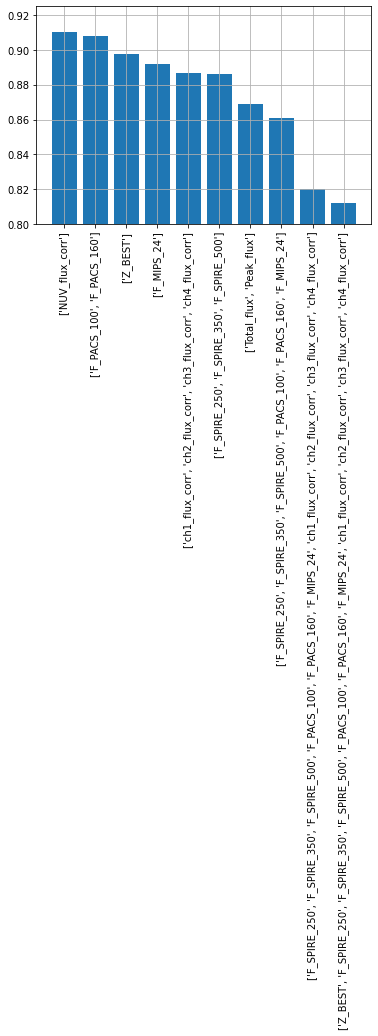

In [61]:
plt.bar(x=range(len(accuracies)), height=accuracies_sorted, tick_label=features_to_remove_sorted)
plt.xticks(rotation = 90)
plt.grid()
plt.ylim(0.8,0.925)

plt.show()